In [1]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
    
dens = os.listdir('./xa_txt_files/rdfs')

try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")


C:\Users\Nick\Desktop\jupyter_analysis_updated
.DS_Store not in directory


In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('./xa_txt_files/rdfs')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

,tauB,sizeBin_x,sizeBin_y,clust_size,r,all-all,all-A,all-B,A-A,A-B,B-A,B-B
0,39.996,5.004457,5.004457,7,0.02004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,39.996,5.004457,5.004457,7,0.04008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.996,5.004457,5.004457,7,0.06012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,39.996,5.004457,5.004457,7,0.08016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,39.996,5.004457,5.004457,7,0.10020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
493,39.996,5.004457,5.004457,7,9.89980,1.001910,1.002293,1.001527,1.003128,1.001458,1.001458,1.001596
494,39.996,5.004457,5.004457,7,9.91984,1.001915,1.002239,1.001590,1.002600,1.001879,1.001879,1.001302
495,39.996,5.004457,5.004457,7,9.93988,1.001797,1.001909,1.001684,1.002139,1.001679,1.001679,1.001689
496,39.996,5.004457,5.004457,7,9.95992,1.001010,1.001150,1.000870,1.001176,1.001123,1.001123,1.000617


In [5]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

C:\Users\Nick\AppData\Local\Temp\ipykernel_9164\3382577195.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_9164\3382577195.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_9164\3382577195.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = True)
C:\Users\Nick\AppData\Local\Temp\ipykernel_9164\3382577195.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  params2 = params2.append(df, ignore_index = Tr

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,500,50.0,1.0,5.0,0.000001
1,0,0,500,50.0,1.0,10.0,0.000001
2,0,0,500,50.0,1.0,15.0,0.000001
3,0,0,500,50.0,1.0,20.0,0.000001
4,0,0,500,50.0,1.0,25.0,0.000001
...,...,...,...,...,...,...,...
91,0,500,500,50.0,1.0,20.0,0.000001
92,0,500,500,80.0,1.0,25.0,0.000001
93,0,500,500,50.0,1.0,25.0,0.000001
94,0,500,500,20.0,1.0,25.0,0.000001


In [6]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,tauB,sizeBin_x,sizeBin_y,clust_size,r,all-all,all-A,all-B,A-A,A-B,B-A,B-B
0,39.996,5.004457,5.004457,7,0.02004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,39.996,5.004457,5.004457,7,0.04008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.996,5.004457,5.004457,7,0.06012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,39.996,5.004457,5.004457,7,0.08016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,39.996,5.004457,5.004457,7,0.10020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
493,39.996,5.004457,5.004457,7,9.89980,1.001910,1.002293,1.001527,1.003128,1.001458,1.001458,1.001596
494,39.996,5.004457,5.004457,7,9.91984,1.001915,1.002239,1.001590,1.002600,1.001879,1.001879,1.001302
495,39.996,5.004457,5.004457,7,9.93988,1.001797,1.001909,1.001684,1.002139,1.001679,1.001679,1.001689
496,39.996,5.004457,5.004457,7,9.95992,1.001010,1.001150,1.000870,1.001176,1.001123,1.001123,1.000617


5.004457
5.004457


test
test
test


C:\Users\Nick\AppData\Local\Temp\ipykernel_9164\545319344.py:283: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


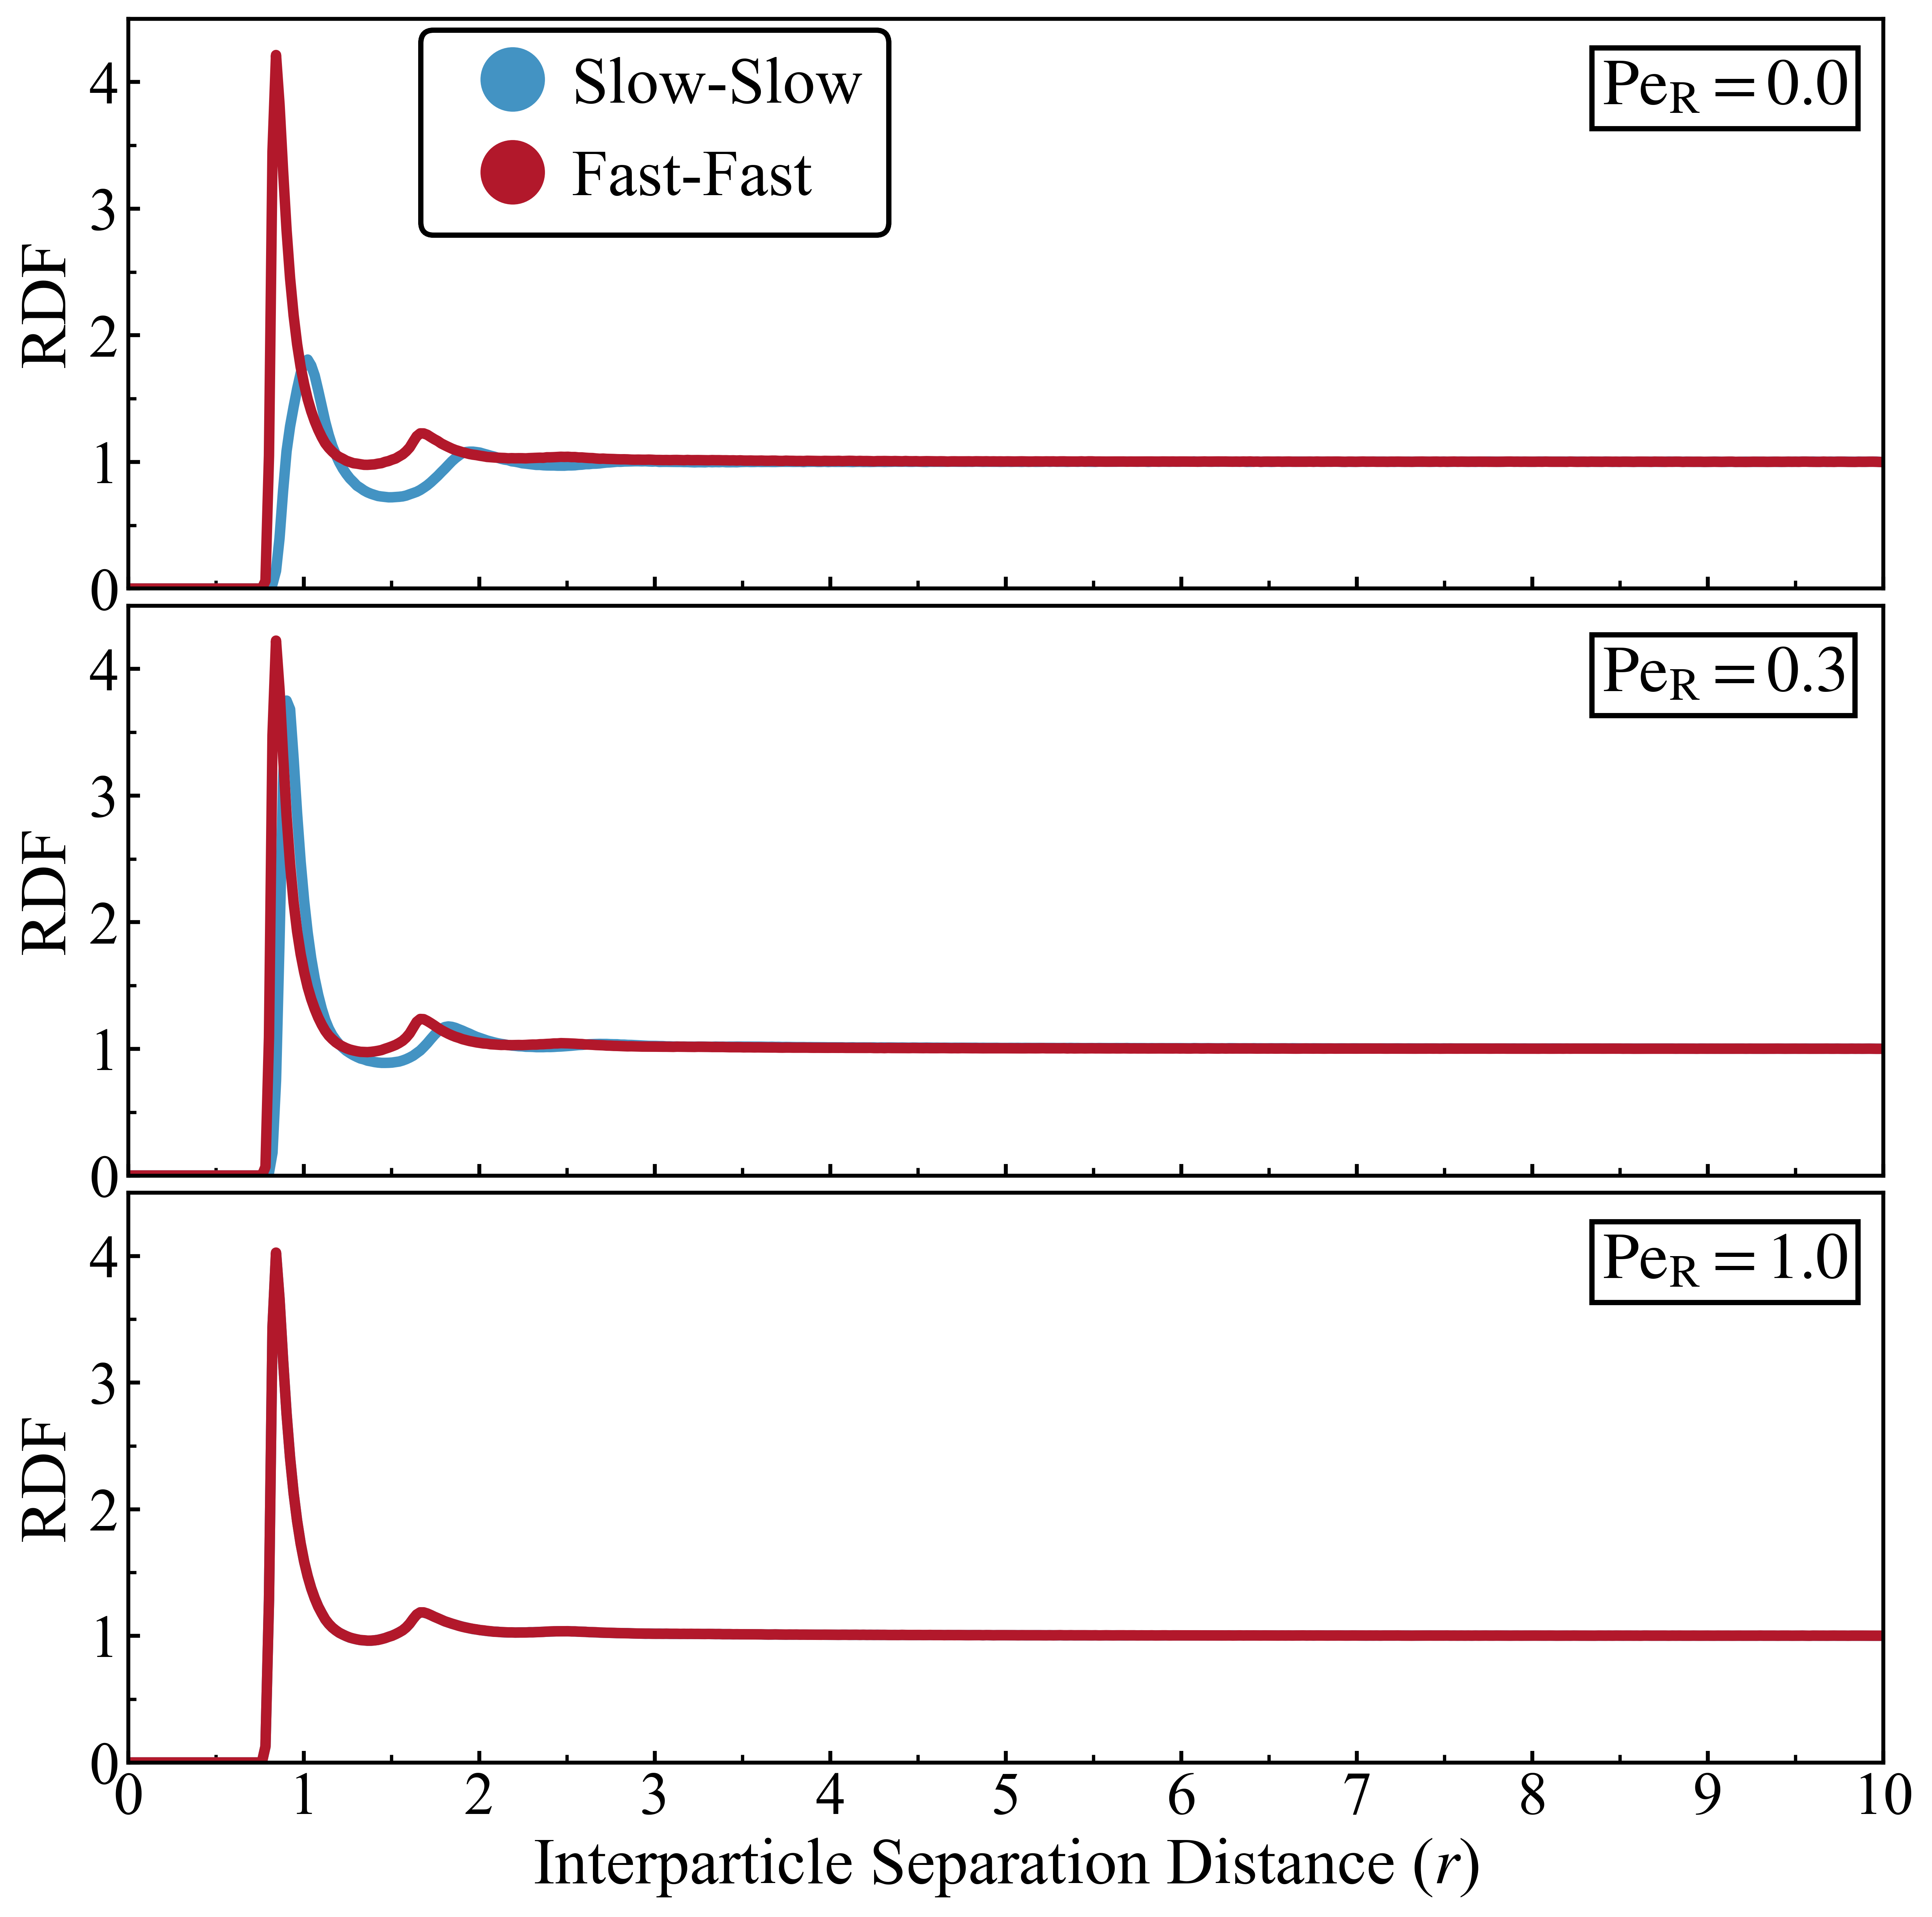

In [7]:
##### Simulation input parameters #####
def draw_brace(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 500./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=3, clip_on=False)

    ax.text((xmax+xmin)/2., yy+.11*yspan, text, ha='center', va='bottom', fontsize=2.7*fsize)
    
def draw_brace2(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.32, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)
    
def draw_brace3(ax, xspan, yy, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 150./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy + (.08*y - .01)*yspan*0.25 # adjust vertical position

    ax.autoscale(False)
    ax.plot(y,x, color='black', lw=3, clip_on=False)

    ax.text((yy+.11*yspan)-0.11, ((xmax+xmin)/2.)-0.43, text, ha='center', va='bottom', fontsize=2.7*fsize, rotation = 270)


import matplotlib.pyplot as plt
plt, ax1 = plt.subplots(3,1, figsize=(12,12))
new_gas = ('#cab2d6')
new_bulk = ('#d9d9d9')
new_int = ('#ffff99')

new_dense = ("#6d4a3b")

new_regd = '#fee391'
new_blue = '#4393c3'
new_red = '#b2182b'
    
new_bulk = "#b2df8a"
new_int = '#d9d9d9'
new_gas = "#fdbf6f"
new_gas = "#f7dcb4"

for k in range(0, len(all_dens)):
    if all_dens[k].empty:
        continue    
    
    if (((params2['peA'][k]==0) | (params2['peA'][k]==150) | (params2['peA'][k]==500)) & (params2['phi'][k]==25) & (params2['xA'][k]==50)):
        print('test')
        

        time_k = all_dens[k]['tauB'][0]
        rad = all_dens[k]['r']
        rdf_allall = all_dens[k]['all-all']
        rdf_allA = all_dens[k]['all-A']
        rdf_allB = all_dens[k]['all-B']
        rdf_AA = all_dens[k]['A-A']
        rdf_BA = all_dens[k]['B-A']
        rdf_AB = all_dens[k]['A-B']
        rdf_BB = all_dens[k]['B-B']
        
        if params2['peA'][k]==0:
            ax1[0].plot(rad, rdf_AA, linewidth=4.0, c=new_blue)
            ax1[0].plot(rad, rdf_BB, linewidth=4.0, c=new_red)
        elif params2['peA'][k]==150:
            ax1[1].plot(rad, rdf_AA, linewidth=4.0, c=new_blue)
            ax1[1].plot(rad, rdf_BB, linewidth=4.0, c=new_red)
        elif params2['peA'][k]==500:
            ax1[2].plot(rad, rdf_AA, linewidth=4.0, c=new_blue)
            ax1[2].plot(rad, rdf_BB, linewidth=4.0, c=new_red)
            
#ax1[0].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.7, 0.7], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
#ax1[0].fill_betweenx(y=[-500, 500], x1=[0.7, 0.7], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
#ax1[0].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

#ax1[0].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[0].plot([0.7, 0.7], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[0].tick_params(axis='y', labelsize=fsize*2.3)
ax1[0].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=1)
ax1[0].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.5)
ax1[0].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=1)
ax1[0].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.5)
ax1[0].xaxis.set_minor_locator(loc)

ax1[0].set_ylim([0.0,4.5])
ax1[0].set_xlim([0, 10])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D


fast_leg=[]
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=new_blue,
                      markerfacecolor=new_blue, 
                      label='Slow-Slow', markersize=(0.85*3.3*msz * mkSz[0])))
fast_leg.append(Line2D([0], [0], lw=0., marker='o', markeredgewidth=1.8*1.2,
                      markeredgecolor=new_red,
                      markerfacecolor=new_red, 
                      label='Fast-Fast', markersize=(0.85*3.3*msz * mkSz[0])))

one_leg = ax1[0].legend(handles=fast_leg, loc='center',
             columnspacing=0.0, handletextpad=-0.1,
             bbox_transform=ax1[0].transAxes, bbox_to_anchor=[0.3, 0.8],
             fontsize=fsize*2.5, frameon=True, ncol=1, edgecolor='black')
one_leg.get_frame().set_linewidth(2.0)
one_leg.get_frame().set_alpha(1.0)
ax1[0].add_artist(one_leg)
"""
one_leg = ax1[1].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[1].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[1].add_artist(one_leg)

one_leg = ax1[2].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[2].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[2].add_artist(one_leg)

one_leg = ax1[3].legend(handles=fast_leg, loc='center',
             columnspacing=0.4, handletextpad=-0.3,
             bbox_transform=ax1[3].transAxes, bbox_to_anchor=[0.08, 0.2],
             fontsize=fsize*2.7, frameon=False, ncol=1)
ax1[3].add_artist(one_leg)
"""
ax1[0].set_ylabel('RDF', fontsize=fsize*2.5)

#ax1[1].plot(avg_int_rad_rad['150'][4:], avg_int_num_dens_all_rad['150'][4:], linewidth=4.0, c='black')

#ax1.plot(avg_int_rad_rad, avg_int_fa_press_all_rad, c='red')

#ax1[1].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.75, 0.75], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
#ax1[1].fill_betweenx(y=[-500, 500], x1=[0.75, 0.75], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
#ax1[1].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)

#ax1[1].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[1].plot([0.75, 0.75], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[1].tick_params(axis='y', labelsize=fsize*2.3)
ax1[1].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=1)
ax1[1].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.5)
ax1[1].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=1)
ax1[1].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.5)
ax1[1].xaxis.set_minor_locator(loc)

ax1[1].set_ylim([0.0,4.5])
ax1[1].set_xlim([0, 10])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D

ax1[0].xaxis.set_tick_params(labelbottom=False)

ax1[1].xaxis.set_tick_params(labelbottom=False)


ax1[1].set_ylabel('RDF', fontsize=fsize*2.5)

#ax1[2].fill_betweenx(y=[-500, 500], x1=[0., 0.], x2=[0.8, 0.8], zorder=-1, color=new_bulk, edgecolor='None', alpha=0.4)
#ax1[2].fill_betweenx(y=[-500, 500], x1=[0.8, 0.8], x2=[1., 1.], zorder=-1, color=new_int, edgecolor='None', alpha=0.7)
#ax1[2].fill_betweenx(y=[-500, 500], x1=[1., 1.], x2=[3.5, 3.5], zorder=-1, color=new_gas, edgecolor='None', alpha=0.6)


#ax1[2].plot([1.0, 1.0], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)
#ax1[2].plot([0.8, 0.8], [-500, 500], color='black', linestyle='dashed', linewidth=3.0, zorder=1)

#plt.plot(avg_int_rad_rad, avg_int_align_all_rad, c='black')

#plt.plot([avg_bub_ext_rad_rad[0], avg_bub_ext_rad_rad[0]], [0, 1], c='blue')
#plt.plot([avg_bub_int_rad_rad[0], avg_bub_int_rad_rad[0]], [0, 1], c='blue')
fsize=10
ax1[2].tick_params(axis='y', labelsize=fsize*2.3)
ax1[2].tick_params(axis='x', labelsize=fsize*2.3)

loc = MultipleLocator(base=1)
ax1[2].yaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.5)
ax1[2].yaxis.set_minor_locator(loc)

loc = MultipleLocator(base=1)
ax1[2].xaxis.set_major_locator(loc)
loc = MultipleLocator(base=0.5)
ax1[2].xaxis.set_minor_locator(loc)

ax1[2].set_ylim([0.0,4.5])
ax1[2].set_xlim([0, 10])

msz = 10
mkSz = [0.8, 0.8]
from matplotlib.lines import Line2D


ax1[2].set_ylabel('RDF', fontsize=fsize*2.5)

t1 = ax1[0].text(0.84,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=0.0$', fontsize=fsize*2.5, transform=ax1[0].transAxes)
t2 = ax1[1].text(0.84,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=0.3$', fontsize=fsize*2.5, transform=ax1[1].transAxes)
t4 = ax1[2].text(0.84,0.85, s=r'$\mathrm{Pe}_\mathrm{R}=1.0$', fontsize=fsize*2.5, transform=ax1[2].transAxes)

t1.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))
t2.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))
t4.set_bbox(dict(facecolor='white', alpha=1.0, edgecolor='black', linewidth=2.0))

#draw_brace2(ax1[0], (-4.49,4.49), 10.1, r'Herding')
#draw_brace3(ax1[2], (-1.61,1.59), 1.1, r'No Herding')
ax1[2].set_xlabel(r'Interparticle Separation Distance ($r$)', fontsize=fsize*2.5)
plt.subplots_adjust(hspace=0.03)
plt.savefig('fig5.png',  dpi=200, pad_inches=0.0, transparent=False)
plt.show()

## 